
# **Week 5**


## **DAY 1**

##### **Neural Network: Cost Function**

###### **Notion**

1. **L**: Total Number of layers in the network.
2. $S_l$: Number Of units in layer "*L*" (exclude Bias unit)
3. **K**: Number of Output/Class

###### **Cost Function For Nueral Network without Regularization**

$J(\Theta) = -\frac{1}{m}\sum_{i=1}^{m}\sum_{k=1}^{K} {[y_k^{(i)}\log(h(\Theta(x^{(i)}))_k) + [(1-y_k^{(i)})\log(1-h(\Theta(x^{(i)}))_k) ]}$


###### **Code**

In [ ]:
# Cost Function
def cost_function(y, h):
  m = y.shape[0]

  # The great trick - we need to recode the labels as vectors containing only values 0 or 1
  y_new = np.zeros((K,m)) # K x m

  # One Hot- Encoding
  for i in range(m):
    y_new[y[i]-1,i] = 1 

  J =  (-1/m)* np.sum( (y_new * np.log(h)) + ((1-y_new)*(np.log(1-h))) )
  return J

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def activation_function(z):
  return 1/(1+np.exp(-z))

features = 2
examples = 3
hidden_layer = 2
K = 4 # no of lbl

X = X = np.cos(np.array([[1,2] , [3,4] , [5,6]])) # 3 x 2 (3 examples, 2 features)
y = np.array([[4],[2],[3]]) # 4 Classes (no of lbl = 4) (3 x 1)
X = np.hstack((np.ones((examples,1)),X)) # 3 x 3 (bias Term)

theta1 = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]]) # 2 x 3
z_2 = theta1.dot(X.T) # 2 x 3
a_2 = activation_function(z_2) # 2 x 3

theta2 = np.array([[0.7,1.1,1.5],[0.8,1.2,1.6],[0.9,1.3,1.7],[1.0,1.4,1.8]]) # 4 x 3
a_2 = np.hstack((np.ones((a_2.shape[1],1)),a_2.T)) # 3 x 3 (bias Term)
z_3 = theta2.dot(a_2.T) # 4 x 3
h = activation_function(z_3) # 4 x 3

print(f"Cost without regularization: {cost_function(y,h)}")

Cost without regularization: 7.40696985606575


## **DAY 2**

###### **Cost Function For Nueral Network with Regularization**

$J(\Theta) = -\frac{1}{m}\sum_{i=1}^{m}\sum_{k=1}^{K} {[y_k^{(i)}\log(h(\Theta(x^{(i)}))_k) + [(1-y_k^{(i)})\log(1-h(\Theta(x^{(i)}))_k) ]} + \frac{\lambda}{2m}\sum_{l=1}^{L-1}\sum_{i=1}^{s_{l}}\sum_{j=1}^{s_{l+1}}(\Theta^{(l)}_{j,i})^2$

###### **Code**

In [ ]:
# Regularization

def regularize(*thetas):
  i = 0
  t = [0]*len(thetas)
  while i < len(thetas):
    t[i] = thetas[i][:,1:]
    i+=1
  
  sqrCost = np.array(t,dtype='object')**2
  sumCost = 0
  for i in sqrCost:
    sumCost += np.sum(i)
  return sumCost

def reg_Cost_Function(y, h, lambda_val, *thetas):
  J = cost_function(y, h) + (regularize(*thetas) * (lambda_val/(2*y.shape[0])))
  return J

In [ ]:
lambda_val = 4
J = reg_Cost_Function(y,h,lambda_val,theta1,theta2)
print(f"Cost with regularization: {J}")

Cost with regularization: 19.473636522732416


## **DAY 3**

#### **Back Propogation**

###### **Intutuion**

Backpropagation" is neural-network terminology for minimizing our cost function, just like what we were doing with gradient descent in logistic and linear regression.

$\min_\Theta J(\Theta)$

In back propagation we're going to compute for every node:

$\delta_j^{(l)}$ = error in node $j$ in layer $l$

For the last layer, we can compute the vector of delta values with:

$\delta^{(L)}=a^{(L)}-y$

Where L is our total number of layers and $a^{(L)}$ is the vector of outputs of the activation units for the last layer. So our **"error values"** for the last layer are simply the differences of our actual results in the last layer and the correct outputs in y.

To get the delta values of the layers before the last layer, we can use an equation that steps us back from right to left:

$\delta^{(l)} = ((\Theta^{(l)})^{T}\delta^{(l+1)}).*g'(z^{(l)})$

The g-prime derivative terms can also be written out as:

$g'(z) = g(z).*(1-g(z))$

The full back propagation equation for the inner nodes is then:

$\delta^{(l)} = ((\Theta^{(l)})^{T}\delta^{(l+1)}).*a^{(l)}.*(1-a^{(l)})$

The delta values of layer l are calculated by multiplying the delta values in the next layer with the theta matrix of layer l. We then element-wise multiply that with a function called g', or g-prime, which is the derivative of the activation function g evaluated with the input values given by $z(l)$.

We can compute our partial derivative terms by multiplying our activation values and our error values for each training example t:

$\frac{∂{J(\Theta)}}{∂{\Theta^{(l)}_{i,j}}} = \frac{1}{m}\sum_{t=1}^{m}a^{(t)(l)}_j*\delta^{(t)(l+1)}_i$

###### **Agorithm**

* Giving Training set {$(x^{(1)},y^{(1)}) \dots (x^{(m)},y^{(m)})$}
* Set $\Delta^{(l)}_{i,j} := 0$ for all $(l,i,j)$
> For all training example t=1 to m:
* Set $a^{(1)} = x^{(t)}$
* Perform forward propogation to calculate $a^{(l)}$ for l=2,3...L
* Using $y^{(t)}$ compute $\delta^{(L)} = a^{(L)}-y^{(t)}$
* Compute $\delta^{(L-1)}, \delta^{(L-2)},\dots,\delta^{(2)}$ using $\delta^{(l)} = ((\Theta^{(l)})^{T}\delta^{(l+1)}).*a^{(l)}.*(1-a^{(l)})$
* $\Delta^{(l)}_{i,j} := \Delta^{(l)}_{i,j} + a_j^{(l)}δ_i^{(l+1)}$ or with vectorization, $Δ^{(l)} := Δ^{(l)} + δ^{(l+1)}(a^{(l)})^T$
* $D_{i,j}^{(l)} := \frac{1}{m}(Δ_{i,j}^{(l)}+λΘ_{i,j}^{(l)})$ If j≠0 (Regularization)\
* $D_{i,j}^{(l)} := \frac{1}{m}Δ_{i,j}^{(l)}$ If j=0

$D_{i,j}^{(l)} = \frac{∂J(Θ)}{∂Θ_{i,j}^{(l)}}$

**Note:**

More formally, the delta values are actually the derivative of the cost function:

$\delta_j^{(l)} = \dfrac{\partial}{\partial z_j^{(l)}} cost(t)$

Recall that our derivative is the slope of a line tangent to the cost function, so the steeper the slope the more incorrect we are.

## **DAY 4**

##### **Code**

###### **Data initilization**

In [ ]:
def init_param(Layers):
  thetas = [np.random.uniform(low=0,high=1,size=(j,i)) for i,j in zip(Layers[:-1],Layers[1:])]
  baises = [np.ones((i,1)) for i in Layers[1:]]
  return np.array(thetas,dtype=object),np.array(baises,dtype=object)

###### **Activation**

In [ ]:
def activation(z, activationType="sigmoid"):
  if activationType == "sigmoid":
    return sigmoid(z)

def sigmoid(z):
  z = np.array(z,dtype=np.float)
  return 1/(1+np.exp(-z))

###### **Forward Propogation**

In [ ]:
def forward_propogation(X, thetas, baises):
  output = [X]
  for theta,bais in zip(thetas,baises):
    Z = np.dot(theta,output[-1].T) + bais
    output.append( activation( Z ,activationType="sigmoid" ).T )

  return output

###### **Backward Propogation**

In [ ]:
import copy
def backward_propagation(y, output, thetas, baises):
  m = y.shape[0]
  delta = []
  dt = []
  db = []
  
  delta = [(output[-1]-y).T * output[-1].T * (1-output[-1].T)]  
  for i in range(-len(thetas),-4,-1):
    dt.append((1/m) * np.dot(delta[-1], output[i])) 
    db.append((1/m) * np.sum(delta[-1]))
    if(i != -3):
      delta.append(np.dot(thetas[-1].T, delta[-1]) * output[i].T * (1-output[i]).T)
    

  # delta = [(output[-1]-y).T * output[-1].T * (1-output[-1].T)]  # (4x1)]
  # dt2 = (1/m) * np.dot(delta[-1], output[-2]) # (1x4) (4x2)
  # db2 = (1/m) * np.sum(delta[-1])

  # delta.append(np.dot(thetas[-1].T, delta[-1]) * output[-2].T * (1-output[-2]).T) #  (2x1) (1x4)
  # dt1 = (1/m) * np.dot(delta[-1], output[-3]) # (2x4) (4x2)
  # db1 = (1/m) * np.sum(delta[-1])

  der_t = np.array(dt,dtype=object)
  der_b = np.array(db,dtype=object)

  return der_t[::-1], der_b[::-1]

###### **Update Parameters**

In [ ]:
def update_param(thetas,baises,dt,db, alpha):

  thetas = thetas - alpha*dt
  baises = baises - alpha*db
  return thetas,baises

###### **Cost**

In [ ]:
def Cost(h,y):
  m = y.shape[0]
  return (-1/m)* np.sum( (y * np.log(h)) + ((1-y)*(np.log(1-h))) )

###### **Gradient Descent**

In [ ]:
def gradient_descent(X, y, alpha, itr, Layers):
    J=[]
    thetas,baises = init_param(Layers)
    for i in range(itr):
      output = forward_propogation(X,thetas,baises)
      dt,db = backward_propagation(y, output, thetas, baises)
      thetas,baises = update_param(thetas,baises,dt,db,alpha)
      J.append(Cost(output[-1],y))
      if i % 10000 == 0:
        print(f"iteration: {i}")
        print(f"Cost Value: {J[-1]}")
    plt.plot(range(itr),J,'g-')
    plt.grid(True)
    plt.show(True)
    
    return thetas,baises

iteration: 0
Cost Value: 1.1522121689838882
iteration: 10000
Cost Value: 0.044474999131574364
iteration: 20000
Cost Value: 0.0260564409294183
iteration: 30000
Cost Value: 0.01995605823099309
iteration: 40000
Cost Value: 0.016702509199772973
iteration: 50000
Cost Value: 0.014616133636648876
iteration: 60000
Cost Value: 0.013137562215807957
iteration: 70000
Cost Value: 0.012021509521447198
iteration: 80000
Cost Value: 0.011141636585874276
iteration: 90000
Cost Value: 0.010425520173262995


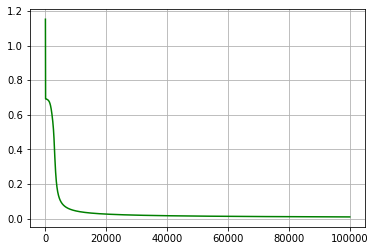

In [ ]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[1],[0],[0],[1]])

thetas,baises = gradient_descent(X, y,alpha=0.5,itr=100000,Layers=[2,3,1])

## **DAY 4**